In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
water = pd.read_csv('../data/cleaned_data/evaluation/water_fertilizer.csv')
prod = pd.read_csv('../data/cleaned_data/evaluation/production_index.csv')
export = pd.read_csv('../data/cleaned_data/evaluation/export_finance.csv')
all = pd.read_csv('../data/cleaned_data/evaluation/all.csv')

In [3]:
# Concat Dataframe
eva = pd.concat([prod,export,water,all],axis=0)
eva

,feature,model,MSE,RMSE,R2
0,production index,Linear,4.310485e+06,2076.170634,-2.919518
1,production index,"ARIMAX(2,0,0)",1.762984e+06,1327.774200,-0.603079
2,production index,GARCH,1.144504e+06,1069.815112,-0.040696
0,export and finance,Linear,6.180495e+05,786.161269,0.438008
1,export and finance,"ARIMAX(2,0,0)",6.880096e+05,829.463438,0.374394
2,export and finance,GARCH,8.122481e+05,901.248093,0.261424
0,water and fertilizer,Linear,3.367581e+06,1835.097088,-2.062137
1,water and fertilizer,"ARIMAX(2,0,0)",1.784461e+06,1335.837130,-0.622608
2,water and fertilizer,GARCH,1.224188e+06,1106.430501,-0.113153
0,all,Linear,1.079529e+06,1039.003790,0.018386


In [4]:
eva['feature'].unique()

array(['production index', 'export and finance', 'water and fertilizer',
       'all'], dtype=object)

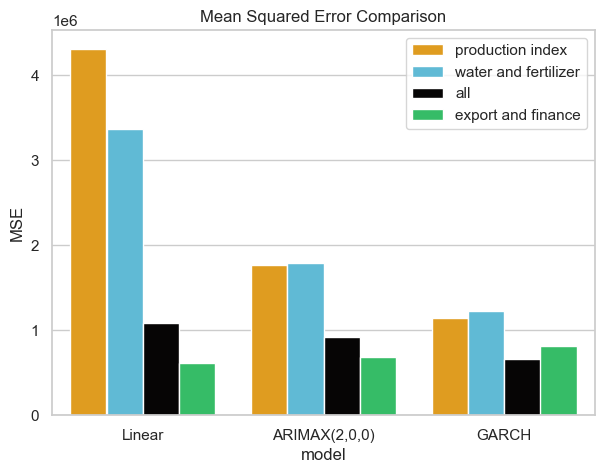

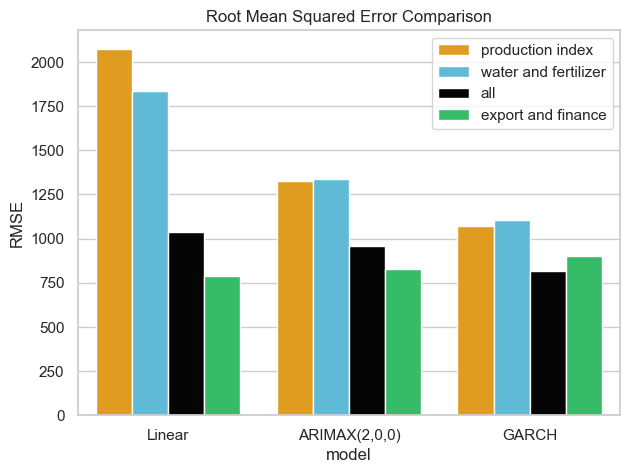

In [5]:
# Set Seaborn style
sns.set(style="whitegrid")

# Set feature colors
feature_colors = {
    'export and finance': '#20D261',  
    'production index': 'orange',
    'water and fertilizer': '#4DC4E8',  
    'all' : '#060505' # Black
}

# Define feature order
feature_order = ['production index', 'water and fertilizer','all', 'export and finance']

# Plot MSE
plt.figure(figsize=(7, 5))
sns.barplot(x='model', y='MSE', hue='feature', hue_order= feature_order,data=eva,palette=feature_colors)
plt.title('Mean Squared Error Comparison')
plt.legend(loc='upper right')
# saving the plot as an image
plt.savefig("../figure/evaluation/Mean Squared Error Comparison.png")
plt.show()


# Plot RMSE
plt.figure(figsize=(7, 5))
sns.barplot(x='model', y='RMSE', hue='feature', hue_order= feature_order, data=eva,palette=feature_colors)
plt.title('Root Mean Squared Error Comparison')
plt.legend(loc='upper right')
# saving the plot as an image
plt.savefig("../figure/evaluation/Root Mean Squared Error Comparison.png")
plt.show()

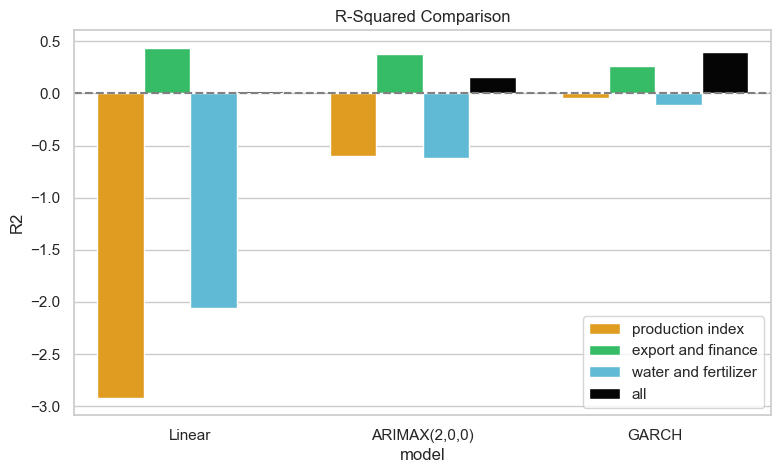

In [6]:
# Plot R-Squared
plt.figure(figsize=(9, 5))
sns.barplot(x='model', y='R2', hue='feature', data=eva,palette=feature_colors)
plt.title('R-Squared Comparison')
plt.axhline(0, color='gray', linestyle='--')  # Reference line at 0
plt.legend(loc='lower right')
# saving the plot as an image
plt.savefig("../figure/evaluation/R-Squared Comparison.png")
plt.show()

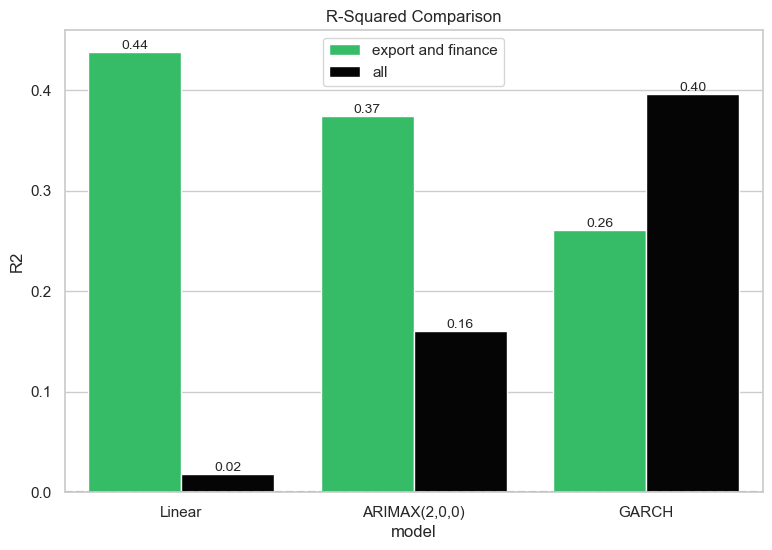

In [7]:
# Plot R-Squared
plt.figure(figsize=(9,6))
ax = sns.barplot(x='model', y='R2', hue='feature', 
            data = eva[eva['feature'].isin(['export and finance','all'])]
            ,palette=feature_colors)
plt.title('R-Squared Comparison')
plt.axhline(0, color='gray', linestyle='--')  # Reference line at 0
plt.legend(loc='upper center')

# Annotate bars with values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)
    
# saving the plot as an image
plt.savefig("../figure/evaluation/R-Squared Comparison between export and finance with all features.png")
plt.show()